In [6]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

import lstm
%matplotlib inline
import time
from matplotlib.animation import FuncAnimation

from IPython import display

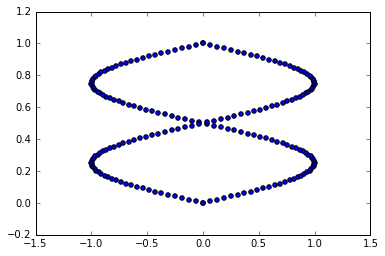

In [7]:
# Training data

def data8(n=100):
    # Generates '8' shaped data

    y = np.linspace(0,1, n)

    x = np.append(np.sin(2*np.pi*y), (-np.sin(2*np.pi*y)))

    return np.column_stack((x,np.append(y,y))).astype(dtype=np.float32)

data = data8()
lead_data = np.roll(data, 1)

plt.scatter(data[:,0], data[:,1])
plt.show()

In [8]:
model = lstm.LSTMCell(2,2)

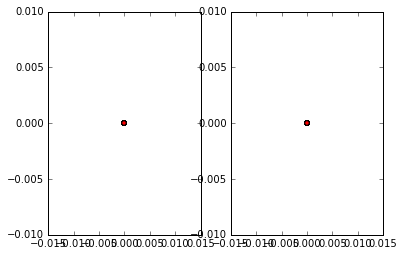

In [9]:
learning_rate = 1e-2
epoches = 1000

[predictions, cell] = model.predict(data)
plt.subplot(121)
plt.scatter(predictions[:,0], predictions[:,1], c = 'r')
plt.subplot(122)
plt.scatter(cell[:,0], cell[:,1], c = 'r')
plt.show()

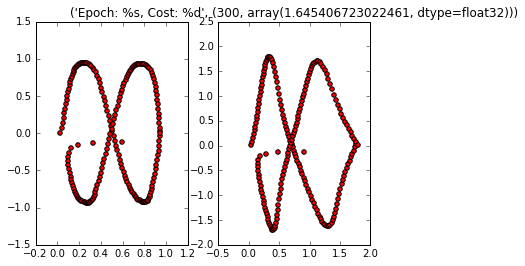

In [ ]:
def train_with_sgd(model, x, y, learning_rate, epoches):
    '''
    Train model.
    '''
    
    for epoch in xrange(epoches):
        model.sgd_step(x, y, learning_rate)
        if(epoch % 100 == 0):
#            reset_output()         
            [predictions, cell] = model.predict(x)


    
            plt.subplot(121)
            plt.gca().cla()
            plt.scatter(predictions[:,0], predictions[:,1],c='r')
            plt.subplot(122)
            plt.gca().cla()
            plt.scatter(cell[:,0], cell[:,1],c='r')
            plt.title(("Epoch: %s, Cost: %d",  (epoch, model.compute_cost(x, y))))
            display.clear_output(wait=True)
            display.display(plt.gcf()) 
            time.sleep(0.5)
               


    return model

train_with_sgd(model, data, lead_data, learning_rate, epoches)